### **Step 0**: Importing necessary libraries

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

#pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

### **Step 1:** Reading the dataset

In [68]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [69]:
df.info()
print(df["education"].unique())
print(df["self_employed"].unique())
print(df["loan_status"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
['Graduate' 'Not Graduate']
['

### **Step 2:** Cleaning up the dataset

In [70]:
df["education"] =  df["education"].map({
    "Graduate" : 1,
    "Not Graduate" : 0
})

df["self_employed"] =  df["self_employed"].map({
    "Yes" : 1,
    "No" : 0
})

df=df.drop(columns="loan_id")

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### **Step 3:** Train/test/validation split

In [71]:
X = df.drop(columns="loan_status")
y_temp = df["loan_status"]

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

# save the categories into a helper list for later purposes
categories = list(le.classes_)
categories


['Approved', 'Rejected']

In [72]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

### **Step 4:** Creating neural network structure

In [73]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Users\zsolt\OneDrive - Óbudai egyetem\Deep Learning\deeplearning\.venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 11)             │            44 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 390 (1.52 KB)

 Trainable params: 368 (1.44 KB)

 Non-trainable params: 22 (88.00 B)

### **Step 5:** Fitting data to the model

In [74]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5475 - loss: 3.8851 - val_accuracy: 0.6328 - val_loss: 3.1028
Epoch 2/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6857 - loss: 2.4964 - val_accuracy: 0.6562 - val_loss: 1.9400
Epoch 3/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8179 - loss: 1.4772 - val_accuracy: 0.8531 - val_loss: 1.0558
Epoch 4/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9140 - loss: 0.7474 - val_accuracy: 0.8953 - val_loss: 0.5345
Epoch 5/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9103 - loss: 0.4160 - val_accuracy: 0.9094 - val_loss: 0.3731
Epoch 6/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9234 - loss: 0.3378 - val_accuracy: 0.9141 - val_loss: 0.3465
Epoch 7/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 0.3244 - val_accuracy: 0.9328 - val_loss: 0.3350
Epoch 8/300
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9160 - loss: 0.3167 - val_accuracy: 0.9312 - v

<Axes: >

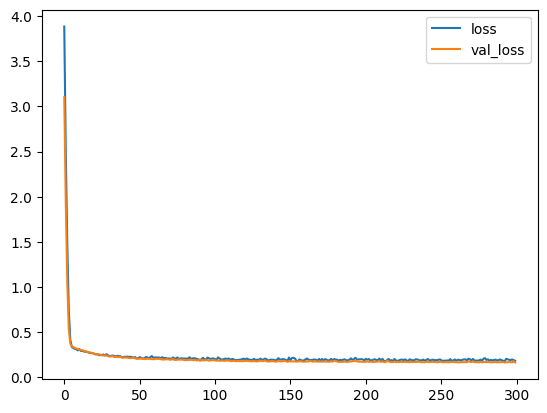

In [75]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

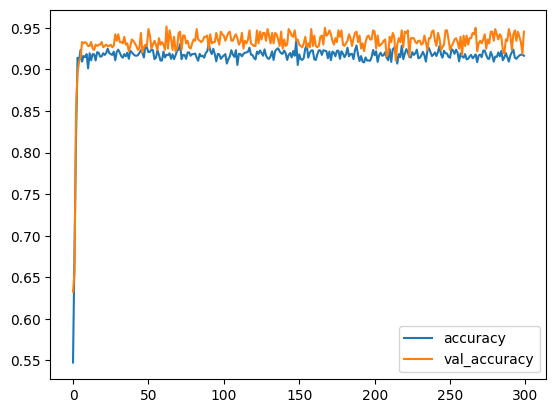

In [76]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [77]:
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.17881114780902863, 0.9313572645187378]

Train data evaluation:
[0.1440822035074234, 0.9524765610694885]


### **Step 5:** Fitting data to the model

In [78]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


### **Step 6:** Metrics

<Axes: >

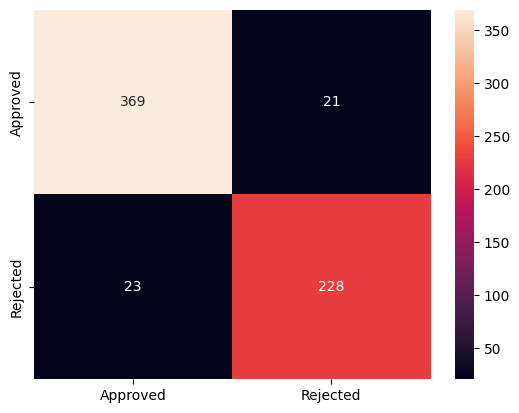

In [79]:
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [80]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

    Approved       0.94      0.95      0.94       390
    Rejected       0.92      0.91      0.91       251

    accuracy                           0.93       641
   macro avg       0.93      0.93      0.93       641
weighted avg       0.93      0.93      0.93       641


Model overall accuracy: 93.14%


In [81]:
roc_auc_score(y, model.predict(X), multi_class="ovr")

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.9894921440255753

### **Step 7:** trying out the model with imaginary new values

In [82]:
print(df.columns)

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')


In [84]:
tester_row = {
    'no_of_dependents' : 1,
      'education': 1,
        'self_employed': 1,
       'income_annum': 9600000, 
       'loan_amount': 29900000, 
       'loan_term': 24, 
       'cibil_score': 800,
       'residential_assets_value': 300000, 
       'commercial_assets_value': 570000,
       'luxury_assets_value': 9000000, 
       'bank_asset_value': 100000000
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

# switch to decimal representation 
np.set_printoptions(precision=9, suppress=True)

# 0 cheapest, 3 most expensive
print(f"Predicted result: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted result: Approved

Probabilities by class:
['Approved', 'Rejected']
[0.99901605  0.000983948]
